# Multivariate Joint Use Case (Single DataFrameCase)

In this vignette a use case of the Multivariate Channel Entropy Triangle is presented. We are going to evaluate some feature transformation performed with the PCA algirthm.

### Importing Libraries

As the functions for the entopies measures are stored in other domain, first we will need to access those modules with the functions and the import all the necessary functions

In [1]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [2]:
from entropytriangle import * #importing all modules necessary for the plotting

## Download the databases

Now it´s time to load the database in which we are going to apply the feature transformation

In [7]:
#df = pd.read_csv('Arthitris.csv',delimiter=',',index_col='Unnamed: 0')
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
#df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
df = discretization(df).fillna(0)

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warning("Discretizing data!")


### Prepare the data for the PCA feature transformation (Features - Classes) 

Importing the Sklearn modules for the feature transformation

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Splitting the Data for the Standarization of the features before the transformation

In [15]:
#features = df.columns.drop('Species')
#x = df[df.columns.drop('Species')].values
x = df.values
# Separating out the target
#y = df.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Transformation of the data. We will store the entropy dataframes in a list, which will store in each possition the features transformations with the corresponding number of number of principal components. The number of principal components will be: 

Number of cols of original df - index 

Example list[0] = Feature transformation with (iris features cols = 4) - (index = 0) = 4 Principal components

In [16]:
li = list()
for i in range(len(df.columns)):
    pca = PCA(n_components = (len(df.columns)-1)-i)
    principalComponents = pca.fit_transform(x)
    columns = list(map(lambda x: "principal component " + str(x), range(len(df.columns)-1-i)))
    principalDf = pd.DataFrame(data = principalComponents, columns= columns)
    li.append(principalDf)


### Channel Multivariate Entropy Triangle

Calculation of the entropy Data Frame for each of the dataframes of the list

In [17]:
edf = list()
for i in range(len(li)-1):
    edf.append(jentropies(df,li[i])) 

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/jentropies.py:50: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warning("Discretizing data from X DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data
/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warning("Discretizing data!")
/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/jentropies.py:54: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warning("Discretizing data from X DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data


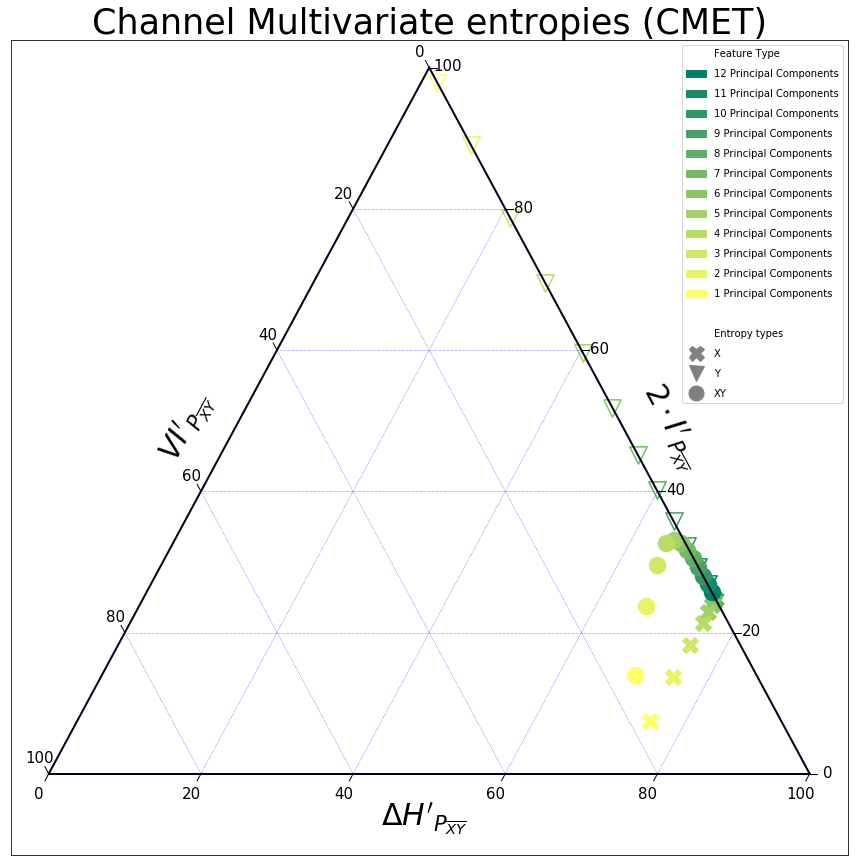

In [18]:
entriangle_list(edf,s_mk=300,pltscale=15)